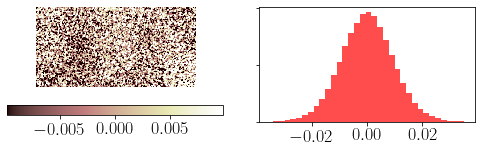

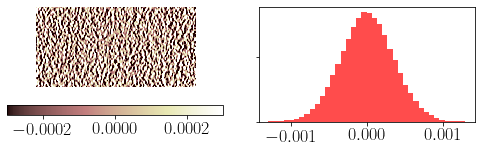

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv

plt.rcParams['axes.facecolor'] = (1, 1, 1)
plt.rcParams['figure.facecolor'] = (1, 1, 1)
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 18
plt.rcParams['image.cmap'] = 'pink' # 'afmhot', 'hot', 'gist_heat'
plt.rcParams['text.usetex'] = True
params = {"ytick.color" : (0, 0, 0),
          "xtick.color" : (0, 0, 0),
          "grid.color" : (.8, .8, .8),
          "text.color" : (.7, .7, .7),
          "axes.labelcolor" : (0, 0, 0),
          "axes.edgecolor" : (0, 0, 0)}
plt.rcParams.update(params)

class Struct:
    def __init__(self, **entries): self.__dict__.update(entries)

MatchID = Struct()

cwd = 'X:\\jxavier\\Orient\\Erasmus\\2021\\Polytech_Clermont-FD\\Stanislas\\EXP\\MMCGTests\\e1O1\\translation'

impcvs = os.path.join(cwd,'U\\e1O1_translation_0001_0.tiff_U.csv')
MatchID.U = np.genfromtxt(impcvs, skip_header=0, delimiter=';')
MatchID.U = MatchID.U[:,:-1]
impcvs = os.path.join(cwd,'V\\e1O1_translation_0001_0.tiff_V.csv')
MatchID.V = np.genfromtxt(impcvs, skip_header=0, delimiter=';')
MatchID.V = MatchID.V[:,:-1]

V_avg = np.mean(MatchID.V)
V_sdt = np.std(MatchID.V)

impcvs = os.path.join(cwd,'Exx\\e1O1_translation_0001_0.tiff_Exx.csv')
MatchID.Exx = np.genfromtxt(impcvs, skip_header=0, delimiter=';')
MatchID.Exx = MatchID.Exx[:,:-1]

Exx_avg = np.mean(MatchID.Exx)
Exx_sdt = np.std(MatchID.Exx)

impcvs = os.path.join(cwd,'Eyy\\e1O1_translation_0001_0.tiff_Eyy.csv')
MatchID.Eyy = np.genfromtxt(impcvs, skip_header=0, delimiter=';')
MatchID.Eyy = MatchID.Eyy[:,:-1]

Eyy_avg = np.mean(MatchID.Eyy)
Eyy_sdt = np.std(MatchID.Eyy)

MatchID.meanU = np.mean(MatchID.U)
MatchID.Unois = MatchID.U - MatchID.meanU

Unois_avg = np.mean(MatchID.Unois)
Unois_sdt = np.std(MatchID.Unois)

fig = plt.figure(figsize=(10,4))
fig.subplots_adjust(top=0.8)
ax11 = fig.add_axes([0.1,0.1,0.3,0.40])
plt.imshow(MatchID.Unois, vmin=-Unois_sdt, vmax=Unois_sdt)
plt.colorbar(location='bottom')
plt.axis('off')
ax12 = fig.add_axes([0.45,0.1,0.3,0.40])
ax12.hist(MatchID.Unois.ravel(), 150, color='red',alpha=0.7)
plt.xlim([-4*Unois_sdt, 4*Unois_sdt])
ax12.set_yticklabels([])
plt.show()
fig.savefig(cwd+'Unoise.png', dpi=300, bbox_inches='tight')

fig = plt.figure(figsize=(10,4))
fig.subplots_adjust(top=0.8)
ax11 = fig.add_axes([0.1,0.1,0.3,0.40])
plt.imshow(MatchID.Exx, vmin=-3*1e-4, vmax=3*1e-4)
plt.colorbar(location='bottom')
plt.axis('off')
ax12 = fig.add_axes([0.45,0.1,0.3,0.40])
ax12.hist(MatchID.Exx.ravel(), 100, color='red',alpha=0.7)
# xrang = np.arange(-3*Exx_sdt, 3*Exx_sdt)
# ax12.set_xticks(xrang)
plt.xlim([-4*Exx_sdt, 4*Exx_sdt])
ax12.set_yticklabels([])
plt.show()

fig.savefig(cwd+'Exxnoise.png', dpi=300, bbox_inches='tight')

# fig = plt.figure(figsize=(10,4))
# fig.subplots_adjust(top=0.8)
# ax11 = fig.add_axes([0.1,0.1,0.3,0.40])
# plt.imshow(MatchID.Eyy, vmin=-Eyy_sdt, vmax=Eyy_sdt)
# plt.colorbar(location='bottom')
# plt.axis('off')
# ax12 = fig.add_axes([0.45,0.1,0.3,0.40])
# ax12.hist(MatchID.Eyy.ravel(), 100, color='red',alpha=0.7)
# plt.xlim([-4*Eyy_sdt, 4*Eyy_sdt])
# ax12.set_yticklabels([])
# plt.show()